In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.set_option('display.float_format', '{:.4g}'.format)

Suppose we draw a sample of size 2 from a population of size 30. The statistics we're interested in are the range and the variance. A (true) simple random sample of size $k$ from a population of size $n$ has chance $1/{n \choose k}$ of resulting in each of the ${n \choose k}$ possible subsets. The joint distribution of the number of times each possible sample is selected in $N$ independent random samples is multinomial with ${n \choose k}$ categories, equal category probabilities $1/{n \choose k}$, and $N$ draws. The pidgeonhold arguments prove that the actual distribution cannot be exactly multinomial, but how bad is the approximation? We can test the hypothesis using as the test statistic the range of category counts. Since we can't trust simulations to give an accurate result (that's the problem we are studying!), we need to rely on asymptotics.

We use PIKK to draw $5 \times 10^7$ samples and compare the following PRNGs: RANDU, Super-Duper, Mersenne Twister, and the SHA-256-based PRNG.

# First order selection probabilities

Under the null, the number of times each individual item is drawn should follow a multinomial distribution with $(5 \times 2) \times 10^7 = 10^8$ draws and equal probabilities $1/30$.

In [2]:
FO = pd.read_csv('firstOrderSummary.csv')
cols = ['PRNG', 'seed', 'Chi-squared', 'Df', 'P-value', 'Range', 'Range P-value']
FO[cols].sort_values(['Range P-value', 'P-value'])

,PRNG,seed,Chi-squared,Df,P-value,Range,Range P-value
3,MT,100,[ 27.5009276],29,[ 0.54469821],8804,0.1436
1,SD,100,[ 21.8881592],29,[ 0.82479075],6921,0.6445
4,MT,233424280,[ 21.8915456],29,[ 0.8246523],6850,0.6667
7,SHA256,233424280,[ 23.4174692],29,[ 0.75710092],6733,0.7024
5,MT,429496729,[ 19.1746724],29,[ 0.91672633],6324,0.8144
8,SHA256,429496729,[ 17.5510508],29,[ 0.95291372],6078,0.869
6,SHA256,100,[ 16.466339],29,[ 0.96983448],5211,0.9764
2,SD,233424280,[ 11.5964336],29,[ 0.99833947],4415,0.998
0,RANDU,100,[ 12.1048622],29,[ 0.99754245],3976,0.9997


# Unique sample selection probabilities

Under the null, the number of times each sample is drawn should follow a multinomial distribution with $5 \times 10^7$ draws and equal probabilities $1/{30 \choose 2}$.

In [3]:
US = pd.read_csv('uniqueSampleSummary.csv')
cols = ['PRNG', 'seed', 'Chi-squared', 'Df', 'P-value', 'Range', 'Range P-value']
US[cols].sort_values(['Range P-value', 'P-value'])

,PRNG,seed,Chi-squared,Df,P-value,Range,Range P-value
0,RANDU,100,[ 12155.0519878],434,[ 0.],8709,-4.441e-16
6,SHA256,100,[ 409.6081138],434,[ 0.79423828],2196,0.171
1,SD,100,[ 355.2852094],434,[ 0.99767171],2189,0.1798
3,MT,100,[ 454.6745488],434,[ 0.23778712],2174,0.1996
5,MT,429496729,[ 493.676701],434,[ 0.02488693],2089,0.341
4,MT,233424280,[ 429.9387088],434,[ 0.54602838],1965,0.6143
8,SHA256,429496729,[ 482.0878312],434,[ 0.05502463],1964,0.6166
7,SHA256,233424280,[ 381.5704324],434,[ 0.96666455],1846,0.8545
2,SD,233424280,[ 289.7548432],434,[ 0.99999999],1422,1


## Selection frequencies for RANDU

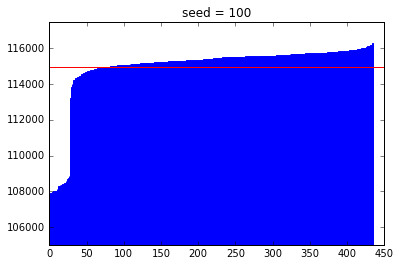

In [4]:
randu_us = pd.read_csv('../rawdata/US_RANDU.csv', header=None)
fig, axes = plt.subplots(figsize=(6, 4))
i = 0

for ss in randu_us[4].unique():
    tmp = randu_us[randu_us[4] == ss]
    xax = np.arange(len(tmp.index))
    yax = np.sort(tmp[1])

    plt.bar(xax, yax, facecolor="b", edgecolor="b")
    axes.set_title('seed = '+ str(ss))
    axes.set_ylim(105000, 117500)
    axes.axhline(y=5*10**7/435, xmin=0, xmax=450, color = "red")
plt.show()

## Selection frequencies for Super-Duper

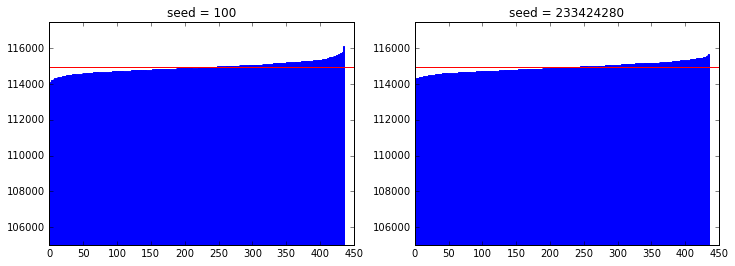

In [5]:
sd_us = pd.read_csv('../rawdata/US_SD.csv', header=None)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
i = 0

for ss in sd_us[4].unique():
    axis = axes[i]
    tmp = sd_us[sd_us[4] == ss]
    xax = np.arange(len(tmp.index))
    yax = np.sort(tmp[1])

    axis.bar(xax, yax, facecolor="b", edgecolor="b")
    axis.set_title('seed = '+ str(ss))
    axis.set_ylim(105000, 117500)
    axis.axhline(y=5*10**7/435, xmin=0, xmax=450, color = "red")
    i += 1
plt.show()

## Selection frequencies for Mersenne Twister

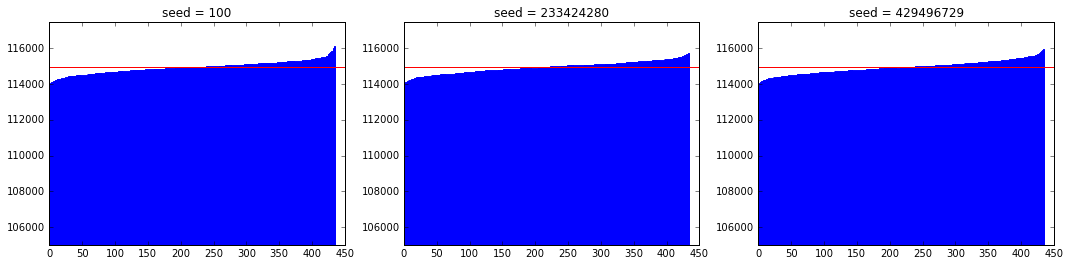

In [6]:
mt_us = pd.read_csv('../rawdata/US_MT.csv', header=None)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
i = 0

for ss in mt_us[4].unique():
    axis = axes[i]
    tmp = mt_us[mt_us[4] == ss]
    xax = np.arange(len(tmp.index))
    yax = np.sort(tmp[1])

    axis.bar(xax, yax, facecolor="b", edgecolor="b")
    axis.set_title('seed = '+ str(ss))
    axis.set_ylim(105000, 117500)
    axis.axhline(y=5*10**7/435, xmin=0, xmax=450, color = "red")
    i += 1
plt.show()

## Selection frequencies for SHA-256 PRNG

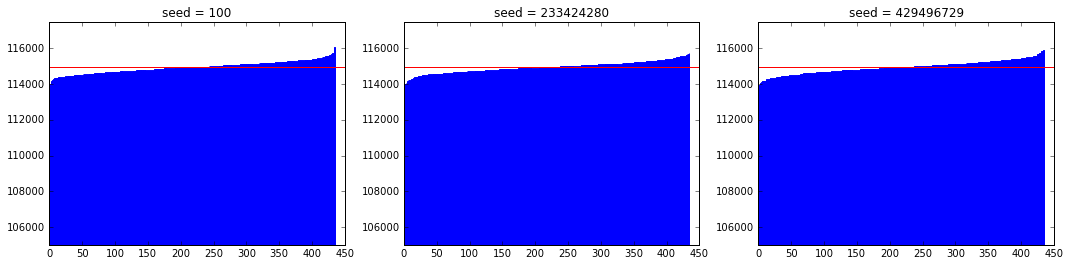

In [7]:
sha_us = pd.read_csv('../rawdata/US_SHA256.csv', header=None)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
i = 0

for ss in sha_us[4].unique():
    axis = axes[i]
    tmp = sha_us[sha_us[4] == ss]
    xax = np.arange(len(tmp.index))
    yax = np.sort(tmp[1])

    axis.bar(xax, yax, facecolor="b", edgecolor="b")
    axis.set_title('seed = '+ str(ss))
    axis.set_ylim(105000, 117500)
    axis.axhline(y=5*10**7/435, xmin=0, xmax=450, color = "red")
    i += 1
plt.show()

# Range statistic

In [8]:
biases = pd.read_csv('statBias.csv')

First, let's look at the range of the sample of size 2. The sample range is 2 with probability ${30 \choose 2}^{-1}$ (when we get 1 and -1 in the sample), 1 with probability ${2 \choose 1}{28 \choose 1}/{30 \choose 2}$ (when we get one of 1 or -1 in the sample), and 0 with probability ${28 \choose 2}/{30 \choose 2}$ (when we get neither 1 nor -1).

Thus, the expected sample range of a sample of size 2 from this population is $0.1333$ and the standard error over the $5 \times 10^7$ samples is $4.902 \times 10^{-5}$.

We use two adversarial methods to construct the population. For the method "least freq sample," we identify the pair of items that occurs least frequently, then put $-1$ and $1$ on those items.  We'd expect the sample range to be biased towards 0 in this case.  For the method "extreme items," we identify the individual items occuring most often and least often throughout all the samples.  We place a $-1$ on the least frequent item and $1$ on the most frequent item.  This may introduce some bias, but its direction isn't clear.

In [9]:
cols = ['PRNG', 'seed', 'method', 'Avg Sample Range', 'Range Bias', 'Range Bias/SE']
biases[cols].sort_values(['Range Bias/SE', 'PRNG', 'seed'], ascending = False)

,PRNG,seed,method,Avg Sample Range,Range Bias,Range Bias/SE
13,SHA256,100,least freq sample,0.1287,0.00464,94.66
15,SHA256,233424280,least freq sample,0.1287,0.004606,93.96
3,SD,100,least freq sample,0.1287,0.004604,93.91
7,MT,100,least freq sample,0.1287,0.004603,93.9
5,SD,233424280,least freq sample,0.1287,0.004596,93.75
9,MT,233424280,least freq sample,0.1288,0.004573,93.29
11,MT,429496729,least freq sample,0.1288,0.004552,92.87
17,SHA256,429496729,least freq sample,0.1288,0.004545,92.71
1,RANDU,100,least freq sample,0.129,0.004362,88.98
10,MT,429496729,extreme items,0.1333,2.893e-05,0.5902


# Sample variance

Next, we look at the variance of the sample of size 2. The sample variance is 2 with probability ${30 \choose 2}^{-1}$ (when we get 1 and -1 in the sample), 1/2 with probability ${2 \choose 1}{28 \choose 1}/{30 \choose 2}$ (when we get one of 1 or -1 in the sample), and 0 with probability ${28 \choose 2}/{30 \choose 2}$ (when we get neither 1 nor -1).

Thus, the expected sample variance of a sample of size 2 from this population is $0.06897$ and the standard error over the $5 \times 10^7$ samples is $2.706 \times 10^{-5}$.

In [10]:
cols = ['PRNG', 'seed', 'method', 'Avg Sample Var', 'Var Bias', 'Var Bias/SE']
biases[cols].sort_values(['Var Bias/SE', 'PRNG', 'seed'], ascending = False)

,PRNG,seed,method,Avg Sample Var,Var Bias,Var Bias/SE
13,SHA256,100,least freq sample,0.06435,0.004619,170.7
15,SHA256,233424280,least freq sample,0.06436,0.004602,170
3,SD,100,least freq sample,0.06436,0.004601,170
7,MT,100,least freq sample,0.06437,0.0046,170
5,SD,233424280,least freq sample,0.06437,0.004597,169.8
9,MT,233424280,least freq sample,0.06438,0.004585,169.4
11,MT,429496729,least freq sample,0.06439,0.004575,169
17,SHA256,429496729,least freq sample,0.06439,0.004571,168.9
1,RANDU,100,least freq sample,0.06449,0.00448,165.5
10,MT,429496729,extreme items,0.06895,1.746e-05,0.645
